In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

In [12]:
def frequency (words):
    '''
    find the frequency of words in a list
    
    input: an list of words
    
    return: dictionary of frequenct
    '''
    
    series = pd.Series(words)
    counts = series.value_counts()
    freq = counts / len(series)
    
    return freq.to_dict()

def to_english(string):
    '''
    convert non english characters to english
    
    input: string that may include non english characters
    
    return: normalized english string
    
    '''
    import unicodedata
    return ''.join(c for c in unicodedata.normalize('NFD', string) if unicodedata.category(c) != 'Mn')

def fun(char):
    '''
    filter function, is used to delete all puntuation
    
    '''
    filters = [' ']
    for i in range(97, 123):
        filters.append(chr(i))
    if char in filters:
        return True
    else:
        return False
    
def splite_words(string):
    '''
    convert string of article to words
    
    input: string (article)
    
    return: list of words
    '''
    data = to_english(string)
    data = data.lower()
    data = ''.join(filter(fun, data))
    data = data.split()
    
    return data

df_all = pd.read_csv('unigram_freq.csv')
dict_all = dict(zip(df_all.word, df_all.word_count))

def frequency (article):
    '''
    find the frequency of words in an article
    
    input: a string of article
    
    return: dictionary of frequenct
    '''
    
    words = splite_words(article)
    series = pd.Series(words)
    counts = series.value_counts()
    freq = counts / len(series)
    
    return freq.to_dict(), counts.to_dict()

def exclude_frequent_words(original_article, frequent_words):
    '''
    exclude the frequent words from the splitted original article
    
    :param original_article: a list of words from the splitted original articla
    :param frequent_words: a list of chosen frequent_words
    
    return a list of words of the article with frequent words being excluded
    '''
    excluded = []
    for word in original_article:
        if word not in frequent_words:
            excluded.append(word)
    return excluded

def ff(filename):
    with open(filename, 'r') as file:
        data = file.read()
    data = frequency(data)
    
    new_dict = {}
    words = (list(data.keys()))
    for i in words:
        try:
            new_dict[i] = data[i] / dict_all[i]
        except:
            new_dict[i] = 0
    
    return new_dict

In [15]:
df_all = pd.read_csv('unigram_freq.csv')
s = df_all['word_count'].sum()
df_all['freq'] = df_all['word_count'] / s
df_all = df_all[df_all['word_count'] < 300000000]
df_all.head(60)
#dict_all = dict(zip(df_all.word, df_all.freq))

,word,word_count,freq
209,united,299280163,0.000509
210,hotel,297974790,0.000507
211,real,297674493,0.000506
212,f,297285731,0.000505
213,item,296534935,0.000504
214,international,295639201,0.000503
215,center,294319118,0.000500
216,ebay,293178760,0.000498
217,must,292774716,0.000498
218,store,291308910,0.000495


In [30]:
df1 = pd.read_csv('unigram_freq.csv')
df1.head()
total_count = df1['word_count'].sum()
df1 = df1[df1['word_count'] > total_count/4e6]

dict_all = pd.Series(df1.word_count.values / total_count, index = df1.word).to_dict()

#print ('word     frequency')
#for i in list(dict_all.keys()):
#    print (i, ':', dict_all[i])

print (df1.head())

  word   word_count
0  the  23135851162
1   of  13151942776
2  and  12997637966
3   to  12136980858
4    a   9081174698


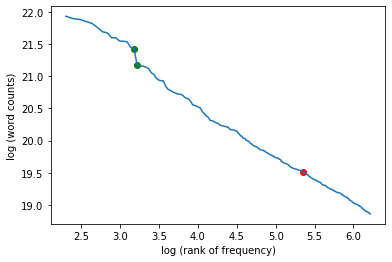

In [136]:
k = 500
l = 10
y = []
x = np.linspace(l, k, k-l)
for i in range(l,k):
    y.append(df1['word_count'][i])
plt.plot(np.log(x), np.log(y))
plt.scatter
plt.scatter(np.log(24), np.log(y[14]), c = 'g')
plt.scatter(np.log(25), np.log(y[15]), c = 'g')
plt.scatter(np.log(210), np.log(y[200]), c = 'r')
#plt.plot(x, y)
plt.xlabel('log (rank of frequency)')
plt.ylabel('log (word counts)')

plt.savefig('plot/' + 'word_count_loglog.png')

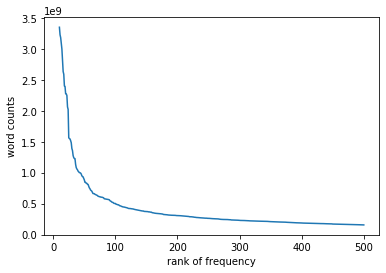

In [139]:
plt.plot(x, y)
plt.xlabel('rank of frequency')
plt.ylabel('word counts')
plt.savefig('plot/' + 'word_count_linear.png')

In [24]:
#print(wei_freq[0]["California recovers $23M from auto parts makers' bid rigging"])
keys = list(count[7].keys())
counts = list(count[7].values())
d = {'words': keys, 'counts': counts}
df_counts = pd.DataFrame(d, columns = ['words', 'counts'])
#max_word = df_counts[df_counts['counts'] == df_counts['counts'].max()]
#print(max_word['words'].to_list()[0])
df_sorted = df_counts.sort_values(by=['counts'], ascending=False)

In [41]:
pos = 'result_csv/'
files = ['ABC_Business.csv', 'ABC_Politics.csv', 'ABC_US.csv', 'BBC_Business.csv', 'BBC_Politics.csv', 'BBC_US_Canada.csv', 'CNN_Business.csv', 'CNN_Politics.csv', 'CNN_US.csv']

freq = [{}, {}, {}, {}, {}, {}, {}, {}, {}]
wei_freq = [{}, {}, {}, {}, {}, {}, {}, {}, {}]
count = [{}, {}, {}, {}, {}, {}, {}, {}, {}]
titles = []

for i in range(9):
    
    path = pos + files[i]
    df = pd.read_csv(path)
    articles = df['Title'].to_list()
    titles.append(articles)
    
    for j in articles:
        article = df[df['Title'] == j]['Article'].to_list()[0]
        freq[i][j], c = frequency(article)
        words = list(freq[i][j].keys())
        wei_freq[i][j] = {}
        
        for k in words:
            
            try:
                wei_freq[i][j][k] = freq[i][j][k] / dict_all[k]
            except:
                wei_freq[i][j][k] = 0
            try:
                count[i][k] = count[i][k] + c[k]
            except:
                count[i][k] = c[k]

In [33]:
arti = []

for i in range(9):
    data = pd.read_csv(pos + files[i])
    articles = []
    for idx, row in data.iterrows():
        articles.append(splite_words(row[2]))

    # print(articles)

    te = TransactionEncoder()
    te_ary = te.fit(articles).transform(articles)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    articles = np.array(articles)
    arti.append(articles)
    
arti = np.array(arti)

In [94]:
kword = ['trade', 'tariffs', 'jones', 'trump', 'impeachment', 'donald', 'house', 'investigation', 'according', 'labour']
k_word = [[], [], [], [], [], [], [], [], [], []]


for i in range(len(files)):
    for j in range(len(titles[i])):
        art = titles[i][j]
        for k in range(len(kword)):
            try:
                a = wei_freq[i][art][kword[k]]
            except:
                a = 0
                
            k_word[k].append(a)

for i in range(len(k_word)):
    k_word[i] = np.array(k_word[i])
    
k_word = np.array(k_word)

for i in range(len(k_word)):
    k_word[i] = k_word[i] / np.mean(k_word[i])
    
kword_ = k_word.transpose()

kmeans = KMeans(n_clusters = 5, random_state = 1).fit_predict(kword_)

1031


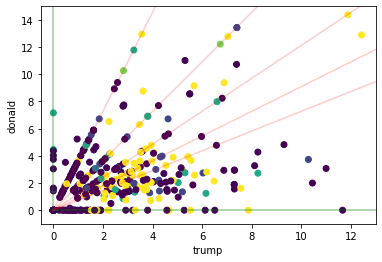

In [135]:
a = 3
b = 5
print (len(k_word[b]))
plt.scatter(k_word[a], k_word[b], c = kmeans)

for i in range(1, 6):
    x = np.linspace(0, min(4.5*i, 20), 1000)
    y = 3.64*x/i
    plt.plot(x,y,c='r',alpha = 0.2)
    plt.xlim(-0.5,13)
    plt.ylim(-1, 15)
    plt.xlabel(kword[a])
    plt.ylabel(kword[b])
    
x0 = np.linspace(0, 15, 1000)
y0 = np.zeros(1000)

y1 = np.linspace(0, 15, 1000)
x1 = np.zeros(1000)

plt.plot(x0, y0, c = 'g', alpha = 0.4)
plt.plot(x1, y1, c = 'g', alpha = 0.4)
plt.savefig('plot/' + 'dt.png')

In [134]:
kword = ['trade', 'tariffs', 'jones', 'trump', 'impeachment', 'donald', 'house', 'investigation', 'according', 'labour']
k_word = [[], [], [], [], [], [], [], [], [], []]


for i in range(len(files)):
    for j in range(len(titles[i])):
        art = titles[i][j]
        for k in range(len(kword)):
            try:
                a = wei_freq[i][art][kword[k]]
            except:
                a = 0
                
            k_word[k].append(a)

for i in range(len(k_word)):
    k_word[i] = np.array(k_word[i])
    
k_word = np.array(k_word)

for i in range(len(k_word)):
    k_word[i] = k_word[i] / np.mean(k_word[i])
    
kword_ = k_word.transpose()

K = 6
kmeans = KMeans(n_clusters = K, random_state = 1).fit_predict(kword_)

#a = 1
#b = 2
#print (len(k_word[b]))
#plt.scatter(k_word[a], k_word[b], c = kmeans)
#plt.xlabel(kword[a])
#plt.ylabel(kword[b])

for i in range(9):
    for j in range(i+1, 10):
        plt.scatter(k_word[i], k_word[j], c = kmeans)
        plt.xlabel(kword[i])
        plt.ylabel(kword[j])
        s = 'plot/' + str(kword[i]) + '_' + str(kword[j]) + '.png'
        plt.savefig(s)
        plt.clf()

<Figure size 432x288 with 0 Axes>

In [125]:
cluster = []
for i in range(K):
    cluster.append(np.where(kmeans == i)[0])
    
print (list(kmeans))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 3, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 1, 2, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 4, 0, 0, 4, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 4, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 5, 5, 0, 3, 5, 0, 5, 0, 0, 3, 5, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 5, 0, 5, 0, 0, 0, 5, 5, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 5, 5, 5, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 5, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 5, 5, 0, 0, 5, 3, 5, 0, 0, 0, 

In [121]:
print (cluster)

[array([ 34,  58,  67,  72, 144, 165, 180, 182, 215, 241, 631, 640, 649,
       657, 659, 706, 724, 754, 807, 871, 934]), array([  10,   19,   71,   77,   85,  111,  141,  143,  181,  192,  202,
        219,  245,  246,  249,  250,  252,  256,  258,  268,  271,  273,
        275,  277,  280,  282,  284,  285,  287,  291,  292,  294,  295,
        296,  303,  304,  306,  307,  312,  316,  317,  319,  320,  322,
        325,  332,  333,  334,  337,  338,  342,  343,  347,  348,  351,
        354,  356,  363,  364,  365,  369,  370,  371,  373,  377,  378,
        383,  385,  391,  392,  393,  396,  398,  401,  403,  405,  407,
        411,  420,  421,  423,  431,  437,  450,  451,  464,  498,  526,
        544,  602,  687,  762,  766,  768,  787,  788,  789,  791,  858,
        866,  868,  869,  870,  872,  875,  876,  877,  879,  881,  886,
        889,  890,  894,  896,  898,  901,  902,  904,  905,  910,  914,
        915,  916,  917,  918,  919,  921,  923,  925,  927,  930,  931,
  